In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from IPython.display import Image 
import io
import pydotplus
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
import pydotplus
import io
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [ ]:
data = pd.read_csv("diabetes_data.csv")

In [ ]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
features = data.columns
features

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [ ]:
def convert_yes_no(txt):
    if 'Yes' in txt:
        return 1
    elif 'Positive' in txt:
        return 1
    elif 'Female' in txt:
        return 1
    else:
        return 0

In [ ]:
data['Gender'] = data['Gender'].apply(convert_yes_no)
data['Polyuria'] = data['Polyuria'].apply(convert_yes_no)
data['Polydipsia'] = data['Polydipsia'].apply(convert_yes_no)
data['sudden weight loss'] = data['sudden weight loss'].apply(convert_yes_no)
data['weakness'] = data['weakness'].apply(convert_yes_no)
data['Polyphagia'] = data['Polyphagia'].apply(convert_yes_no)
data['Genital thrush'] = data['Genital thrush'].apply(convert_yes_no)
data['visual blurring'] = data['visual blurring'].apply(convert_yes_no)
data['Itching'] = data['Itching'].apply(convert_yes_no)
data['Irritability'] = data['Irritability'].apply(convert_yes_no)
data['delayed healing'] = data['delayed healing'].apply(convert_yes_no)
data['partial paresis'] = data['partial paresis'].apply(convert_yes_no)
data['muscle stiffness'] = data['muscle stiffness'].apply(convert_yes_no)
data['Alopecia'] = data['Alopecia'].apply(convert_yes_no)
data['Obesity'] = data['Obesity'].apply(convert_yes_no)
data['class'] = data['class'].apply(convert_yes_no)


In [ ]:
data.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = [x for x in features if x != 'class' and x!= 'Polyuria']
features

['Age',
 'Gender',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity']

In [ ]:
X = data[features]
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

print(len(X))
print(len(x_train))
print(len(x_test))

520
346
174


In [ ]:
RF = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0)
RF = RF.fit(x_train, y_train)

In [ ]:
print(RF)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [ ]:
y_pred = RF.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Random Forest Classifier: ", round(score, 1), "%" )

Accuracy using Random Forest Classifier:  98.9 %


In [ ]:
print(RF.score(x_test, y_test))

0.9885057471264368


In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 66   1]
 [  1 106]]


In [ ]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(logistic.score(x_test, y_test))

0.8908045977011494


In [ ]:
svmr = SVC(kernel='linear')
svmr.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(svmr.score(x_test, y_test))


0.9022988505747126


In [ ]:
metrics.confusion_matrix(y_test, svmr.predict(x_test))

array([[ 56,  11],
       [  6, 101]])

In [ ]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
print(y_pred)

[1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1
 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1
 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0
 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1]


In [ ]:
y_pred = dt.predict(x_test)
print(dt.score(x_test, y_test))
metrics.confusion_matrix(y_test, y_pred)

0.9482758620689655


array([[ 64,   3],
       [  6, 101]])

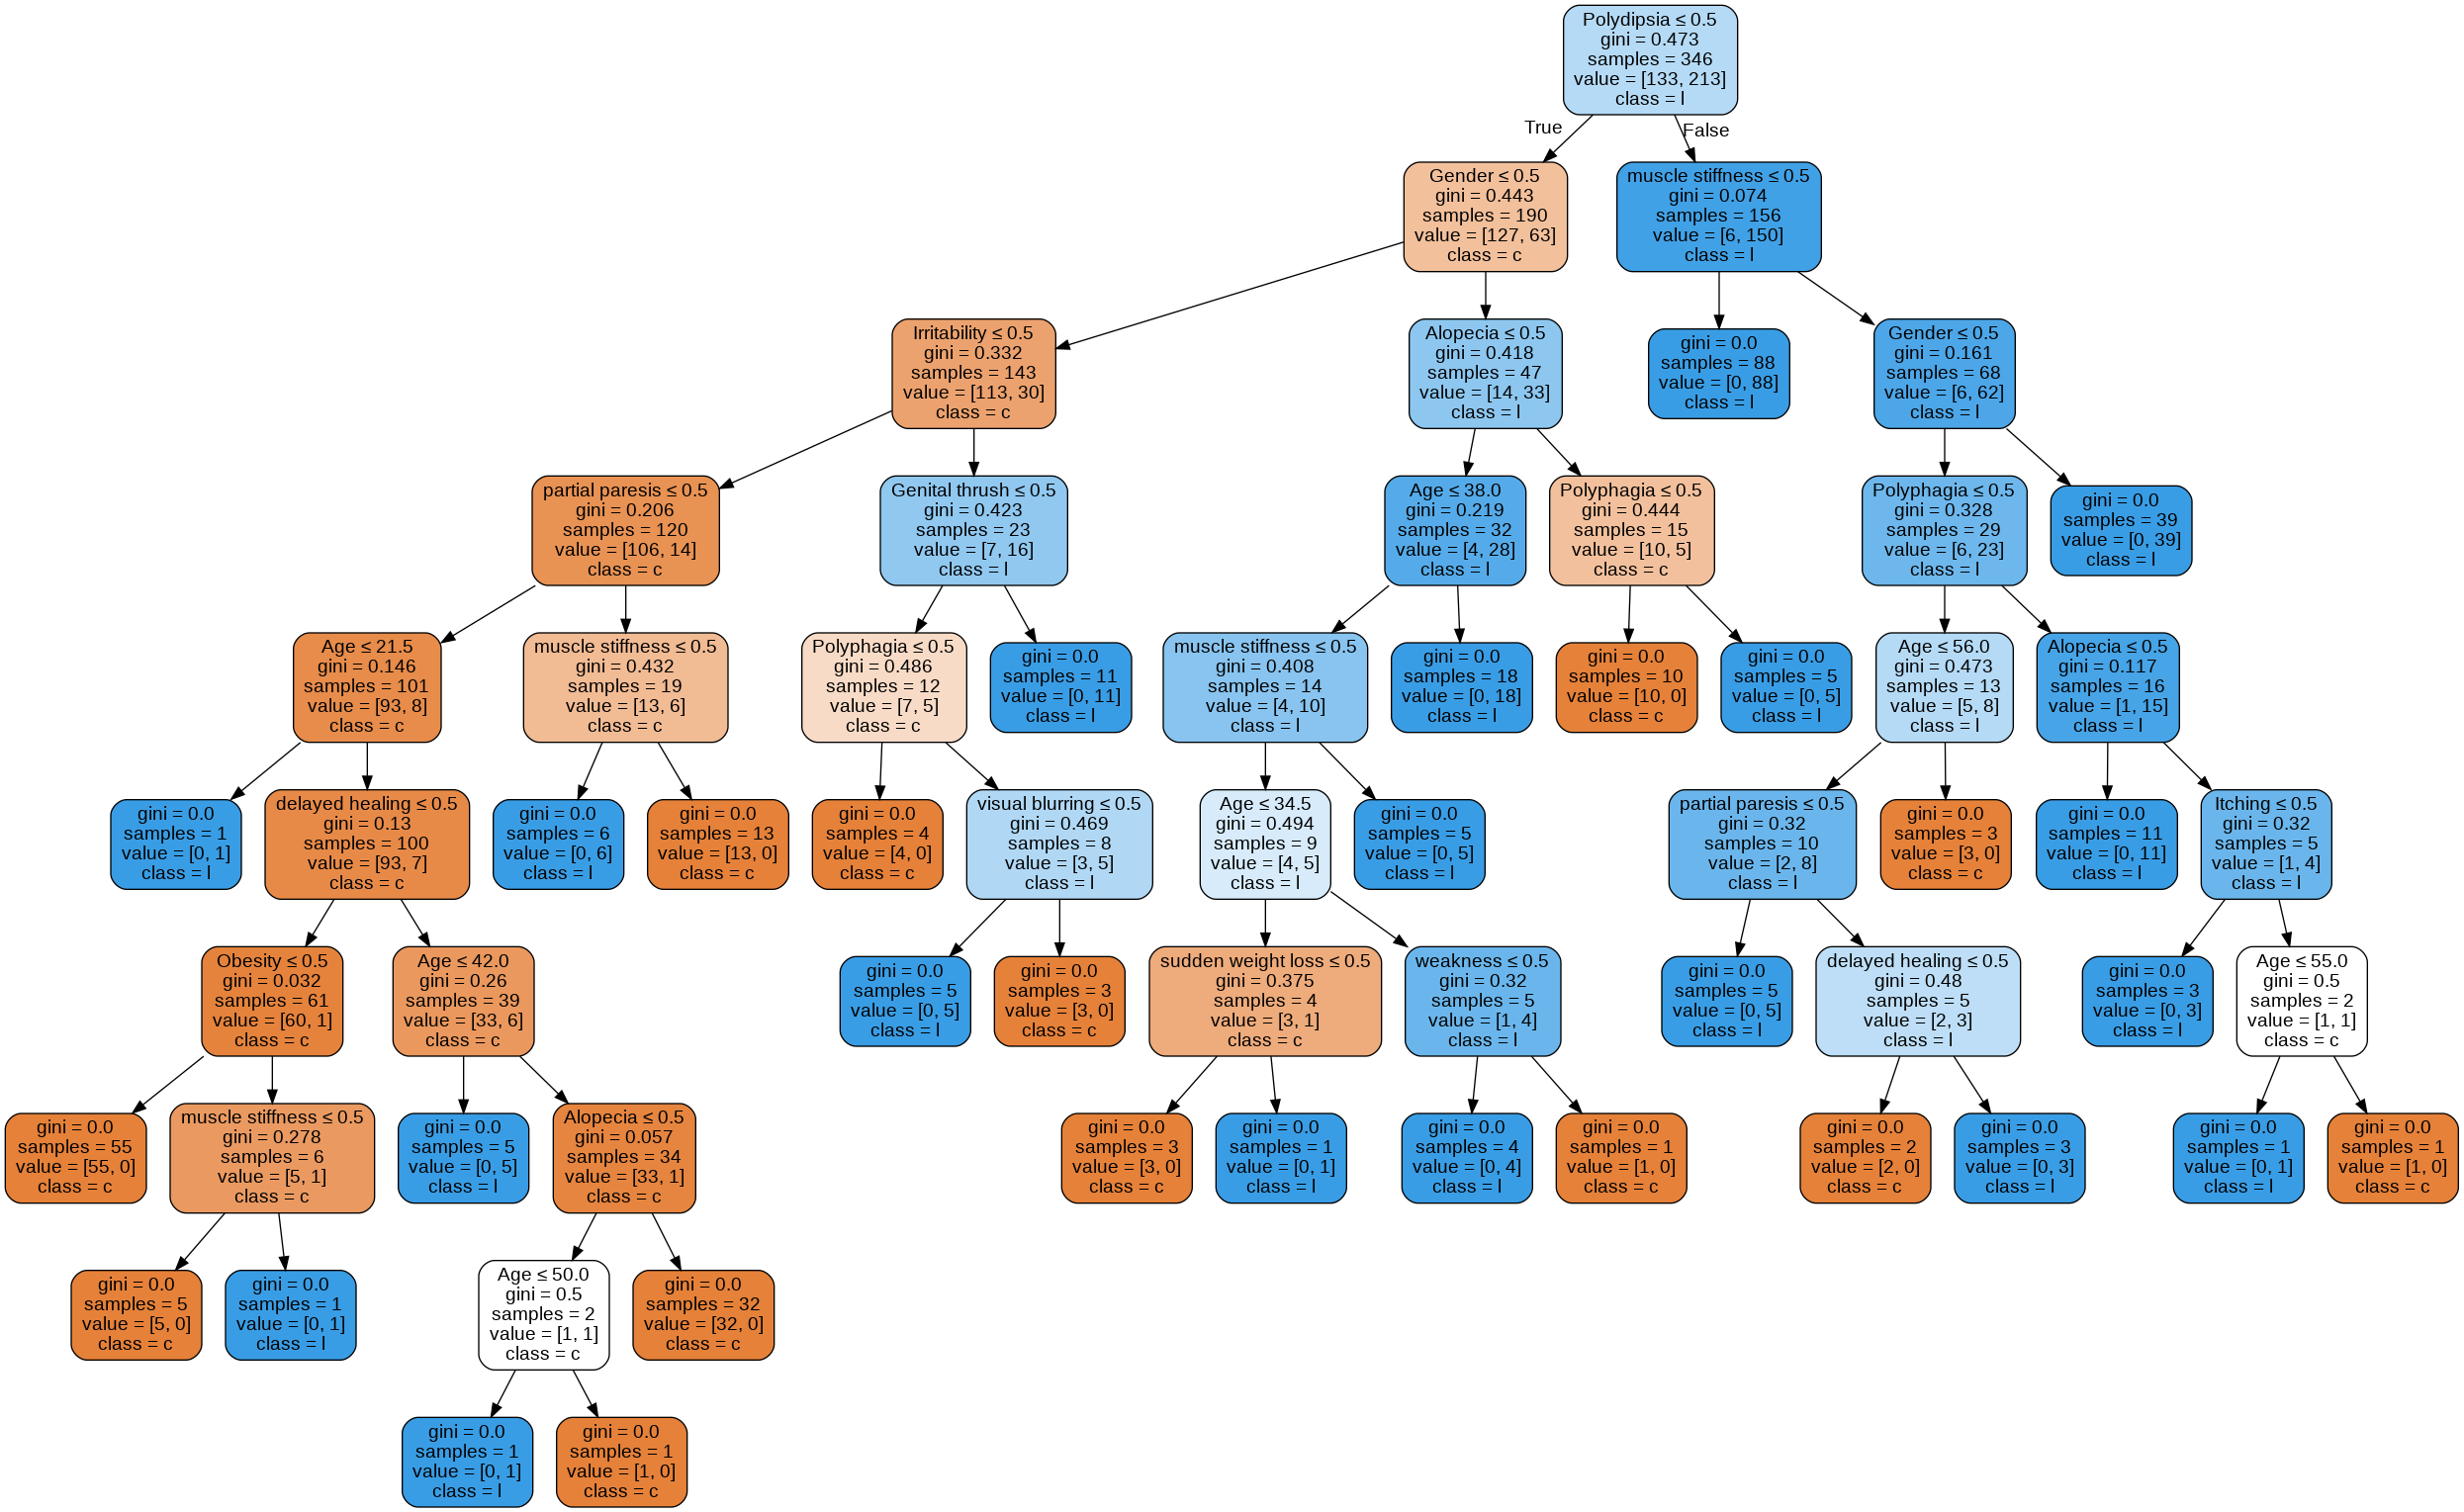

In [ ]:

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=features,  
                     class_names='class',
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())